In [31]:
import pandas as pd
import plotly.express as px

In [3]:
# Retrieve timeseries data - daily S&P500 closing prices from 1980 to 2022
df = pd.read_csv('SPX.csv') 
df.drop(["Open", "High", "Low", "Volume"], axis=1, inplace = True)
df["Date"] = pd.to_datetime(df['Date'], format='%d/%m/%Y') 
df.set_index('Date', inplace=True)

display(df.head())
print(df.shape)

,Close
Date,
1980-05-01,105.46
1980-05-02,105.58
1980-05-05,106.38
1980-05-06,106.25
1980-05-07,107.18


(10644, 1)


# 1. Feature Engineering

In [4]:
features = df.copy()

### 1. a) Date time features

In [5]:
features['year'] = df.index.year
features['month'] = df.index.month
features['day'] = df.index.day

### 1. b) Lag features

In [6]:
features['lag_day'] = df['Close'].shift(1)
features['lag_day2'] = df['Close'].shift(2)
features['lag_week'] = df['Close'].shift(5)

### 1. c) Rolling window features

In [7]:
features['rol_mean'] = df['Close'].rolling(window = 5).mean()
features['rol_std'] = df['Close'].rolling(window = 5).std()
features['rol_max'] = df['Close'].rolling(window = 5).max()
features['rol_min'] = df['Close'].rolling(window = 5).min()

### 1. d) Expanding window features

In [8]:
features['exp_mean'] = df['Close'].expanding().mean()
features['exp_std'] = df['Close'].expanding().std()
features['exp_max'] = df['Close'].expanding().max()
features['exp_min'] = df['Close'].expanding().min()

In [9]:
features

,Close,year,month,day,lag_day,lag_day2,lag_week,rol_mean,rol_std,rol_max,rol_min,exp_mean,exp_std,exp_max,exp_min
Date,,,,,,,,,,,,,,,
1980-05-01,105.46,1980,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.460000,NaN,105.46,105.46
1980-05-02,105.58,1980,5,2,105.46,NaN,NaN,NaN,NaN,NaN,NaN,105.520000,0.084853,105.58,105.46
1980-05-05,106.38,1980,5,5,105.58,105.46,NaN,NaN,NaN,NaN,NaN,105.806667,0.500133,106.38,105.46
1980-05-06,106.25,1980,5,6,106.38,105.58,NaN,NaN,NaN,NaN,NaN,105.917500,0.464641,106.38,105.46
1980-05-07,107.18,1980,5,7,106.25,106.38,NaN,106.170,0.693325,107.18,105.46,106.170000,0.693325,107.18,105.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-13,3801.78,2022,7,13,3818.80,3854.43,3845.08,3855.402,45.770007,3902.62,3801.78,1176.832688,997.937269,4796.56,102.42
2022-07-14,3790.38,2022,7,14,3801.78,3818.80,3902.62,3832.954,44.323615,3899.38,3790.38,1177.078299,998.211957,4796.56,102.42
2022-07-15,3863.16,2022,7,15,3790.38,3801.78,3899.38,3825.710,31.999777,3863.16,3790.38,1177.330703,998.504606,4796.56,102.42


# 2. Resampling
### 2. a) Downsampling - decrease sample frequency

In [21]:
weekly_df = df.resample('W').mean()
quarterly_df = df.resample('Q').mean()

display(weekly_df.head())
display(quarterly_df.head())

,Close
Date,
1980-05-04,105.5200
1980-05-11,106.1320
1980-05-18,106.4540
1980-05-25,108.5280
1980-06-01,111.2425


,Close
Date,
1980-06-30,111.120476
1980-09-30,123.226562
1980-12-31,132.912857
1981-03-31,131.642903
1981-06-30,132.819524


### 2. b) Upsampling - increase sample frequency

In [33]:
daily_df = weekly_df.resample('D').mean()
display(daily_df.head(10))

,Close
Date,
1980-05-04,105.520
1980-05-05,NaN
1980-05-06,NaN
1980-05-07,NaN
1980-05-08,NaN
1980-05-09,NaN
1980-05-10,NaN
1980-05-11,106.132
1980-05-12,NaN


In [34]:
# To fill up NaN values, we can fit linear lines between the weekly values
daily_df['linear_interpol'] = daily_df['Close'].interpolate(method='linear')
display(daily_df.head(10))

fig = px.line(daily_df, y=["linear_interpol"])
fig.show()

,Close,linear_interpol
Date,,
1980-05-04,105.520,105.520000
1980-05-05,NaN,105.607429
1980-05-06,NaN,105.694857
1980-05-07,NaN,105.782286
1980-05-08,NaN,105.869714
1980-05-09,NaN,105.957143
1980-05-10,NaN,106.044571
1980-05-11,106.132,106.132000
1980-05-12,NaN,106.178000


In [35]:
# To smooth edges in graph, we can also fit polynomial lines
daily_df['poly_interpol'] = daily_df['Close'].interpolate(method='spline', order=2)
display(daily_df.head(10))

fig = px.line(daily_df, y=["poly_interpol"])
fig.show()

,Close,linear_interpol,poly_interpol
Date,,,
1980-05-04,105.520,105.520000,105.520000
1980-05-05,NaN,105.607429,105.546277
1980-05-06,NaN,105.694857,105.587025
1980-05-07,NaN,105.782286,105.638595
1980-05-08,NaN,105.869714,105.700986
1980-05-09,NaN,105.957143,105.774198
1980-05-10,NaN,106.044571,105.858231
1980-05-11,106.132,106.132000,106.132000
1980-05-12,NaN,106.178000,106.058762


# 3. Power Transformation
### Make non-linear series linear
### 3. a) Moving average smoothing
Considerations
- window width
- position (trailing or centered)

### 3. b) Exponential smoothing - assign larger weights to more recent values

# 4. Decomposition
Identify our series' 4 components
- level
- trend
- Seasonality
- Noise

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

### 4. a) Additive model
Suggests that y(t) = level + trend + seasonality + noise

In [41]:
type(df['Close'])

pandas.core.series.Series

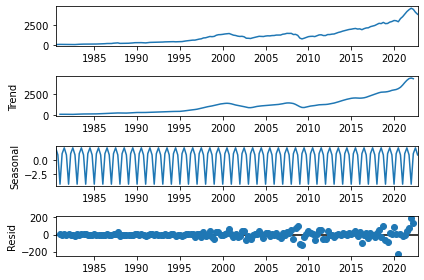

In [68]:
add_decomp = seasonal_decompose(quarterly_df, model='additive',period=4) # set period to whatever you think the seasonalities' interval is
add_decomp.plot();

### 4. b) Multiplicative model
Suggests that y(t) = level * trend * seasonality * noise

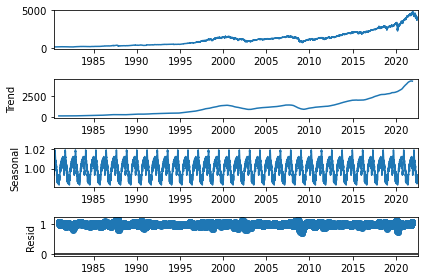

In [69]:
mult_decomp = seasonal_decompose(df, model='multiplicative', period=300)
mult_decomp.plot();